# LAPD Crime Data Analysis (2020-2024)

This notebook contains exploratory data analysis of LAPD crime data from 2020 to 2024.

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ephem
from scipy import stats

# Set style for better visualizations
plt.style.use('seaborn-v0_8')
sns.set_theme()

## Loading and Examining the Data

In [26]:
# Read the CSV file
df = pd.read_csv('data/lapd-crime-2020-2024.csv')

# Display basic information about the dataset
print("Dataset Shape:", df.shape)
print("\nDataset Info:")
df.info()

Dataset Shape: (1132581, 28)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1132581 entries, 0 to 1132580
Data columns (total 28 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   DR_NO           1132581 non-null  int64  
 1   Date Rptd       1132581 non-null  object 
 2   DATE OCC        1132581 non-null  object 
 3   TIME OCC        1132581 non-null  int64  
 4   AREA            1132581 non-null  int64  
 5   AREA NAME       1132581 non-null  object 
 6   Rpt Dist No     1132581 non-null  int64  
 7   Part 1-2        1132581 non-null  int64  
 8   Crm Cd          1132581 non-null  int64  
 9   Crm Cd Desc     1132581 non-null  object 
 10  Mocodes         950907 non-null   object 
 11  Vict Age        1132581 non-null  int64  
 12  Vict Sex        958694 non-null   object 
 13  Vict Descent    958678 non-null   object 
 14  Premis Cd       1132559 non-null  float64
 15  Premis Desc     1131938 non-null  objec

In [27]:
# Display first few rows of the dataset
print("First few rows of the dataset:")
df.head()

First few rows of the dataset:


,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,190326475,03/01/2020 12:00:00 AM,03/01/2020 12:00:00 AM,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,...,AA,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506
1,200106753,02/09/2020 12:00:00 AM,02/08/2020 12:00:00 AM,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,IC,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628
2,200320258,11/11/2020 12:00:00 AM,11/04/2020 12:00:00 AM,1700,3,Southwest,356,1,480,BIKE - STOLEN,...,IC,Invest Cont,480.0,NaN,NaN,NaN,1400 W 37TH ST,NaN,34.0210,-118.3002
3,200907217,05/10/2023 12:00:00 AM,03/10/2020 12:00:00 AM,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,IC,Invest Cont,343.0,NaN,NaN,NaN,14000 RIVERSIDE DR,NaN,34.1576,-118.4387
4,200412582,09/09/2020 12:00:00 AM,09/09/2020 12:00:00 AM,630,4,Hollenbeck,413,1,510,VEHICLE - STOLEN,...,IC,Invest Cont,510.0,NaN,NaN,NaN,200 E AVENUE 28,NaN,34.0820,-118.2130


In [28]:
df.head().to_csv('data/lapd-crime-2020-2024-sample.csv')
print('File read successfully!')

File read successfully!


In [29]:
# Basic statistical summary
print("Statistical summary of numerical columns:")
df.describe()

Statistical summary of numerical columns:


,DR_NO,TIME OCC,AREA,Rpt Dist No,Part 1-2,Crm Cd,Vict Age,Premis Cd,Weapon Used Cd,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LAT,LON
count,1.132581e+06,1.132581e+06,1.132581e+06,1.132581e+06,1.132581e+06,1.132581e+06,1.132581e+06,1.132559e+06,351009.000000,1.132570e+06,74197.000000,2454.000000,66.000000,1.132581e+06,1.132581e+06
mean,2.225727e+08,1.342977e+03,1.067779e+01,1.114253e+03,1.390357e+00,4.997437e+02,2.830318e+01,3.045728e+02,364.359350,4.995186e+02,958.638975,984.252649,991.439394,3.400704e+01,-1.181209e+02
std,1.407318e+07,6.495219e+02,6.119173e+00,6.121463e+02,4.878305e-01,2.034390e+02,2.211088e+01,2.209837e+02,123.879917,2.032479e+02,109.833785,52.119244,26.679943,1.517943e+00,5.259346e+00
min,8.170000e+02,1.000000e+00,1.000000e+00,1.010000e+02,1.000000e+00,1.100000e+02,-4.000000e+00,1.010000e+02,101.000000,1.100000e+02,210.000000,310.000000,821.000000,0.000000e+00,-1.186676e+02
25%,2.110045e+08,9.000000e+02,5.000000e+00,5.850000e+02,1.000000e+00,3.310000e+02,0.000000e+00,1.010000e+02,311.000000,3.310000e+02,998.000000,998.000000,998.000000,3.401550e+01,-1.184309e+02
50%,2.215067e+08,1.425000e+03,1.100000e+01,1.137000e+03,1.000000e+00,4.420000e+02,3.000000e+01,2.030000e+02,400.000000,4.420000e+02,998.000000,998.000000,998.000000,3.405920e+01,-1.183236e+02
75%,2.320054e+08,1.900000e+03,1.600000e+01,1.613000e+03,2.000000e+00,6.260000e+02,4.400000e+01,5.010000e+02,400.000000,6.260000e+02,998.000000,998.000000,998.000000,3.416490e+01,-1.182740e+02
max,2.521041e+08,2.359000e+03,2.100000e+01,2.199000e+03,2.000000e+00,9.560000e+02,1.200000e+02,9.760000e+02,516.000000,9.560000e+02,999.000000,999.000000,999.000000,3.433430e+01,0.000000e+00


In [30]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:")
print(missing_values[missing_values > 0])

Missing Values:
Mocodes            181674
Vict Sex           173887
Vict Descent       173903
Premis Cd              22
Premis Desc           643
Weapon Used Cd     781572
Weapon Desc        781572
Status                  2
Crm Cd 1               11
Crm Cd 2          1058384
Crm Cd 3          1130127
Crm Cd 4          1132515
Cross Street       962618
dtype: int64


## Data Visualization

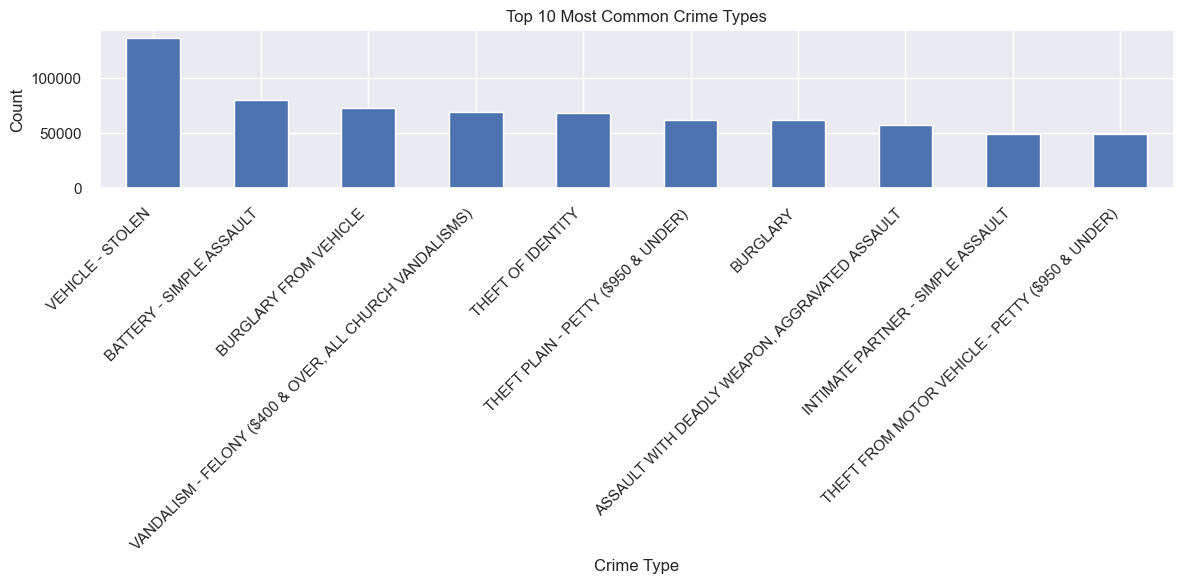

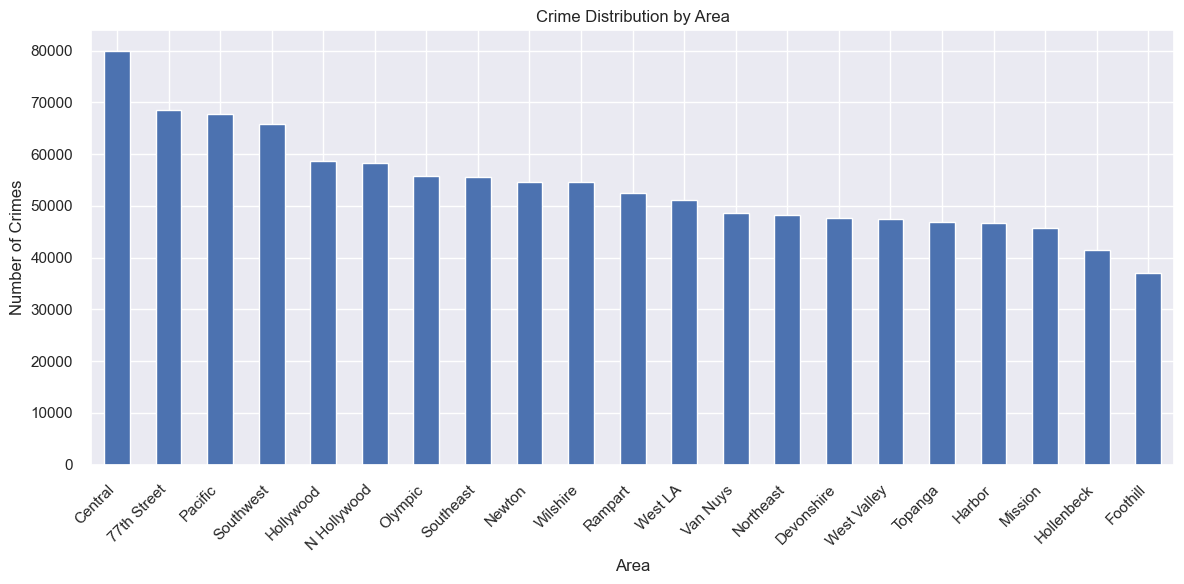

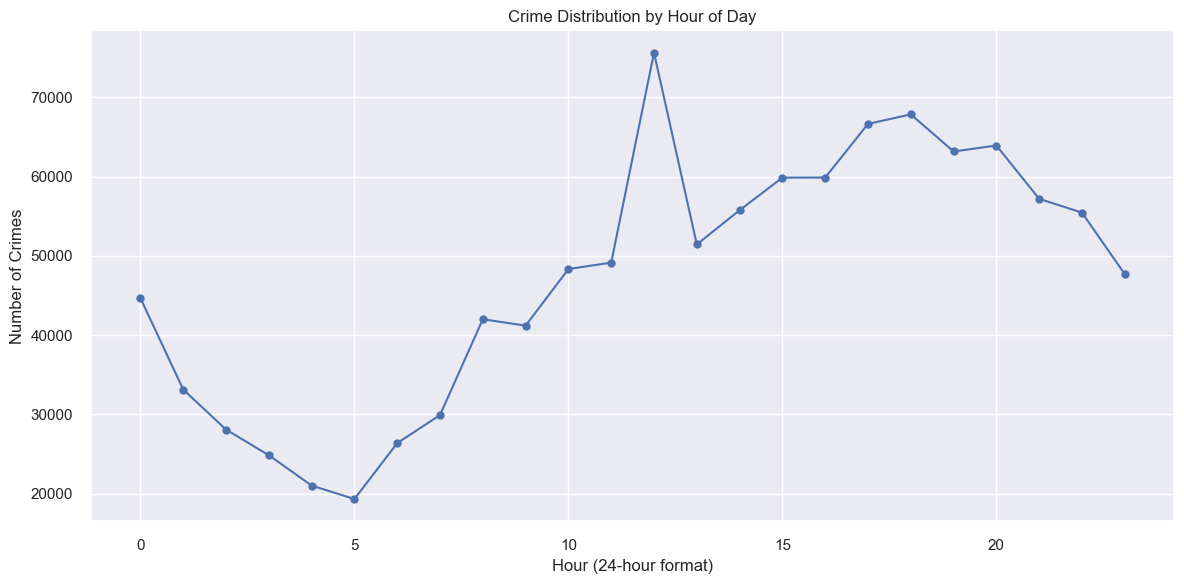

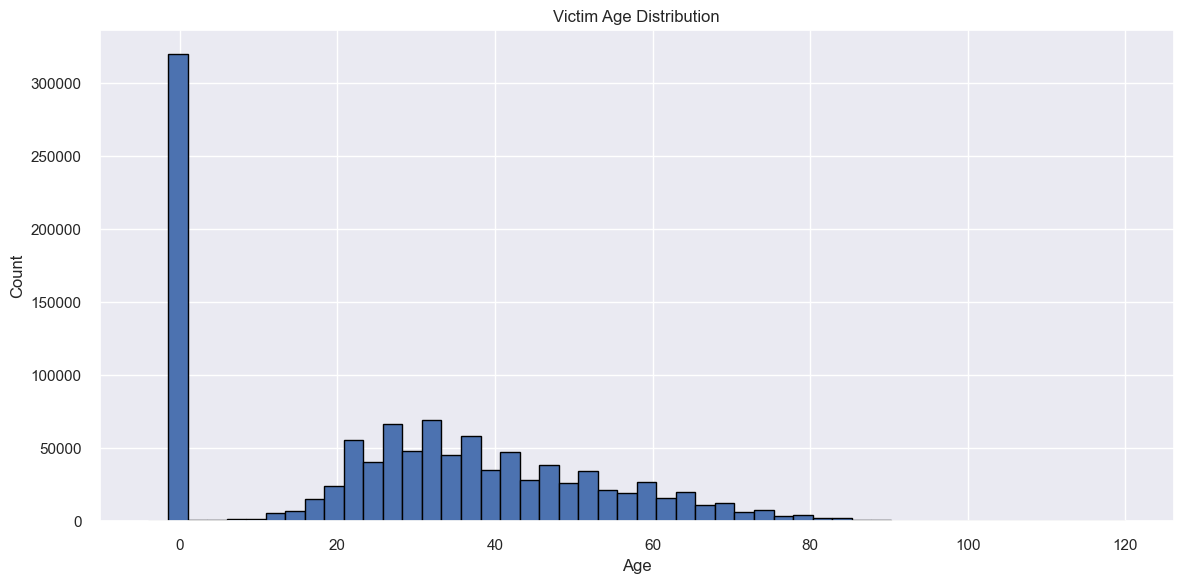

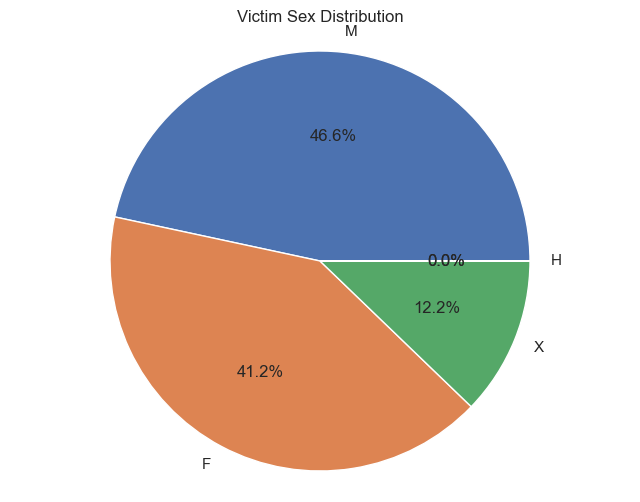

In [31]:
# Top 10 most common crime types
plt.figure(figsize=(12, 6))
crime_counts = df['Crm Cd Desc'].value_counts().head(10)
crime_counts.plot(kind='bar')
plt.title('Top 10 Most Common Crime Types')
plt.xlabel('Crime Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# %%
# Crime distribution by area
plt.figure(figsize=(12, 6))
area_counts = df['AREA NAME'].value_counts()
area_counts.plot(kind='bar')
plt.title('Crime Distribution by Area')
plt.xlabel('Area')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# %%
# Time of day analysis
plt.figure(figsize=(12, 6))
df['Hour'] = df['TIME OCC'] // 100
hourly_crimes = df['Hour'].value_counts().sort_index()
hourly_crimes.plot(kind='line', marker='o')
plt.title('Crime Distribution by Hour of Day')
plt.xlabel('Hour (24-hour format)')
plt.ylabel('Number of Crimes')
plt.grid(True)
plt.tight_layout()
plt.show()

# %% [markdown]
# ## Victim Demographics Analysis

# %%
# Victim age distribution
plt.figure(figsize=(12, 6))
plt.hist(df['Vict Age'], bins=50, edgecolor='black')
plt.title('Victim Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.grid(True)
plt.tight_layout()
plt.show()

# %%
# Victim sex distribution
plt.figure(figsize=(8, 6))
victim_sex = df['Vict Sex'].value_counts()
plt.pie(victim_sex, labels=victim_sex.index, autopct='%1.1f%%')
plt.title('Victim Sex Distribution')
plt.axis('equal')
plt.show()

## Moon Phase Analysis

In [32]:
# Convert date columns to datetime
df['Date Rptd'] = pd.to_datetime(df['Date Rptd'])
df['DATE OCC'] = pd.to_datetime(df['DATE OCC'])

# Function to calculate moon phase
def get_moon_phase(date):
    moon = ephem.Moon()
    # Convert date to ephem date format
    ephem_date = ephem.Date(date.strftime('%Y/%m/%d'))
    moon.compute(ephem_date)
    # Returns phase as percentage (0-100)
    return moon.phase

/var/folders/9g/fxcdx40n7nb_yl7r9dcmjpzc0000gn/T/ipykernel_91970/3954785845.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date Rptd'] = pd.to_datetime(df['Date Rptd'])
/var/folders/9g/fxcdx40n7nb_yl7r9dcmjpzc0000gn/T/ipykernel_91970/3954785845.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['DATE OCC'] = pd.to_datetime(df['DATE OCC'])


## Binary Moon Phase Analysis
Let's analyze the relationship between crime rates during Full Moon versus other phases.

Calculating moon phases...

Average Daily Crimes by Moon Phase:
            Avg Daily Crimes  Number of Days
Moon Phase                                  
0.024809               554.0               1
0.028071              1000.0               1
0.038645               738.0               1
0.041624               615.0               1
0.043669               476.0               1
...                      ...             ...
99.954720              624.0               1
99.960358              513.0               1
99.960701              663.0               1
99.972214              518.0               1
99.978188              966.0               1

[1858 rows x 2 columns]


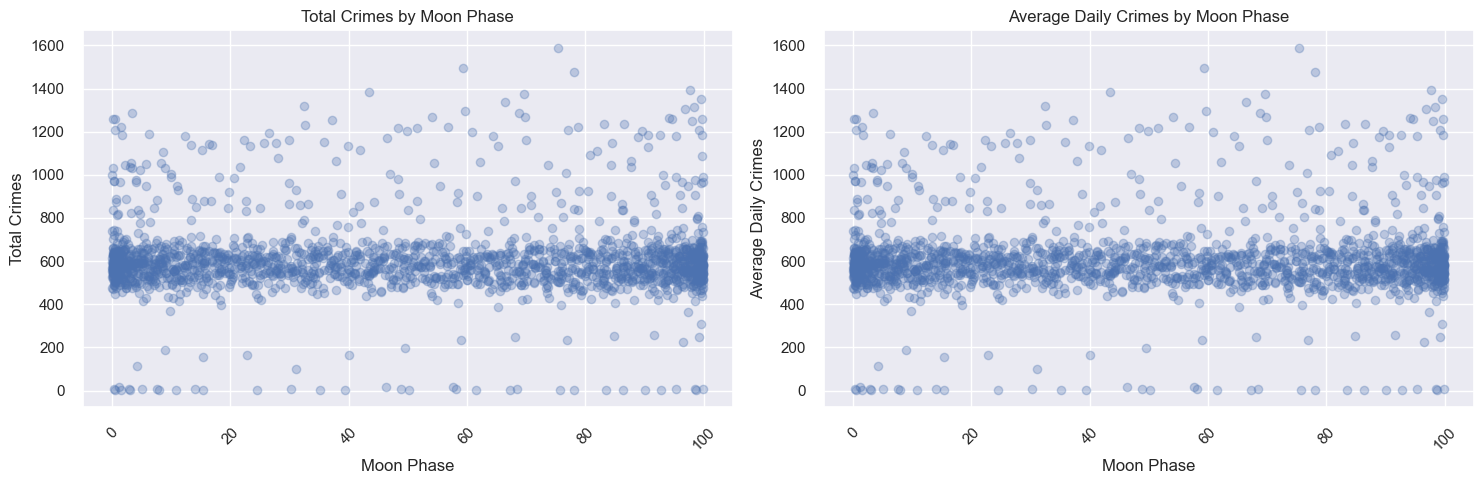


Average Daily Crimes by Moon Phase (Binary):
                   Avg Daily Crimes  Number of Days
Moon Phase Binary                                  
Full Moon                    620.37              62
Others                       608.86            1797


In [35]:
# Add moon phase column
print("Calculating moon phases...")
df['Moon Phase'] = df['DATE OCC'].apply(get_moon_phase)

# First, let's analyze the total crimes and average daily crimes by moon phase
# Calculate total crimes by moon phase
total_crimes = df.groupby('Moon Phase').size().reset_index(name='Total Crimes')

# Calculate daily crime counts
daily_crimes_by_phase = df.groupby(['DATE OCC', 'Moon Phase']).size().reset_index(name='crimes')

# Calculate average daily crimes by moon phase
avg_daily_crimes = daily_crimes_by_phase.groupby('Moon Phase')['crimes'].agg(['mean', 'count']).round(2)
avg_daily_crimes.columns = ['Avg Daily Crimes', 'Number of Days']
print("\nAverage Daily Crimes by Moon Phase:")
print(avg_daily_crimes)

# Create visualizations for total crimes and average daily crimes
plt.figure(figsize=(15, 5))

# Plot total crimes by moon phase
plt.subplot(1, 2, 1)
plt.scatter(total_crimes['Moon Phase'], total_crimes['Total Crimes'], alpha=0.3)
plt.title('Total Crimes by Moon Phase')
plt.xlabel('Moon Phase')
plt.ylabel('Total Crimes')
plt.xticks(rotation=45)

# Plot average daily crimes by moon phase
plt.subplot(1, 2, 2)
plt.scatter(avg_daily_crimes.index, avg_daily_crimes['Avg Daily Crimes'], alpha=0.3)
plt.title('Average Daily Crimes by Moon Phase')
plt.xlabel('Moon Phase')
plt.ylabel('Average Daily Crimes')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Now create binary moon phase categories (Full Moon vs Others)
def categorize_moon_phase_binary(phase):
    if 93.75 <= phase < 96.25:  # Full Moon range
        return 'Full Moon'
    else:
        return 'Others'

df['Moon Phase Binary'] = df['Moon Phase'].apply(categorize_moon_phase_binary)

# Calculate daily crime counts with binary categories
daily_crimes = df.groupby(['DATE OCC', 'Moon Phase Binary']).size().reset_index(name='crimes')

# Calculate summary statistics for binary categories
summary_stats = daily_crimes.groupby('Moon Phase Binary')['crimes'].agg(['mean', 'count']).round(2)
summary_stats.columns = ['Avg Daily Crimes', 'Number of Days']
print("\nAverage Daily Crimes by Moon Phase (Binary):")
print(summary_stats)

In [36]:
# Perform statistical analysis
full_moon_crimes = daily_crimes[daily_crimes['Moon Phase Binary'] == 'Full Moon']['crimes']
other_crimes = daily_crimes[daily_crimes['Moon Phase Binary'] == 'Others']['crimes']
t_stat, p_value = stats.ttest_ind(full_moon_crimes, other_crimes)

print(f"\nStatistical Analysis:")
print(f"Independent t-test results:")
print(f"t-statistic: {t_stat:.2f}")
print(f"p-value: {p_value:.4f}")

if p_value < 0.05:
    print("\nThere is a statistically significant difference in crime rates between Full Moon and other phases.")
else:
    print("\nThere is no statistically significant difference in crime rates between Full Moon and other phases.")


Statistical Analysis:
Independent t-test results:
t-statistic: 0.49
p-value: 0.6225

There is no statistically significant difference in crime rates between Full Moon and other phases.


## Distribution of Crimes by Area and Moon Phase
Let's visualize how crime rates vary by area during Full Moon versus other phases.

In [37]:
# Create distribution plots by area with binary categories
daily_crimes_by_area = df.groupby(['DATE OCC', 'AREA NAME', 'Moon Phase Binary']).size().reset_index(name='crimes')

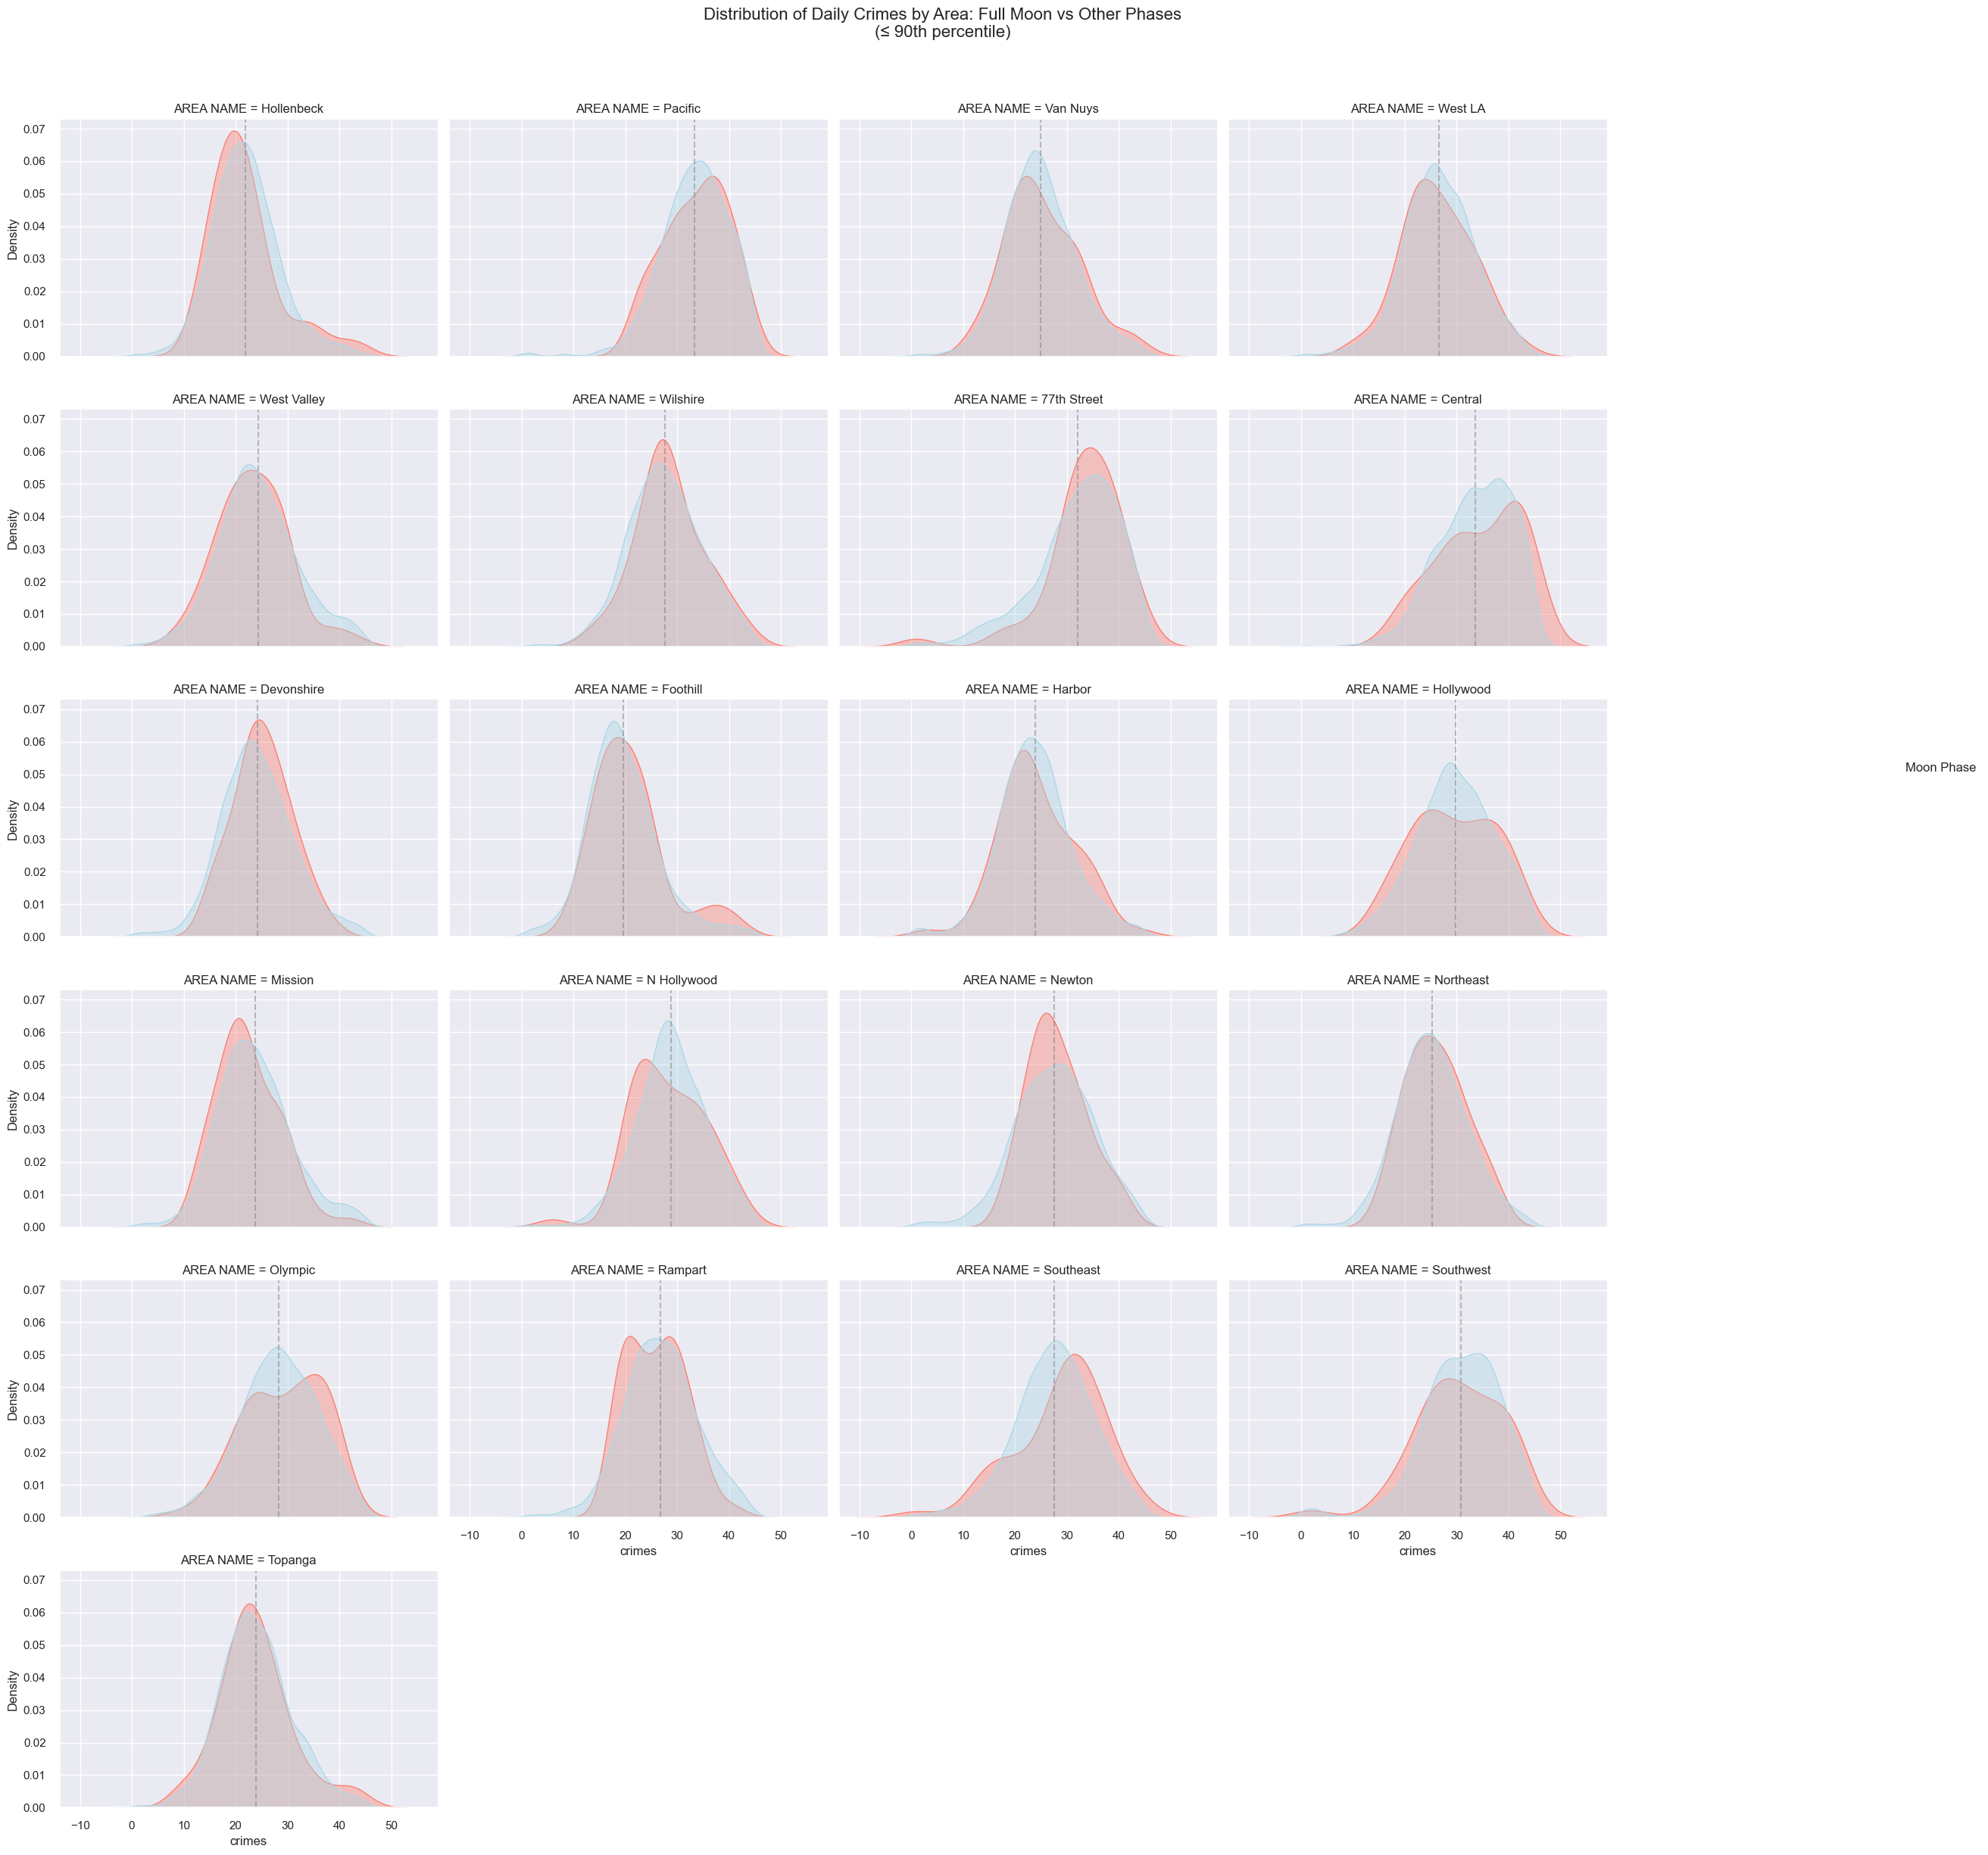

In [38]:
# Filter out NaN values and calculate 90th percentile
valid_phases = daily_crimes_by_area.dropna(subset=['Moon Phase Binary'])
percentile_90 = valid_phases['crimes'].quantile(0.90)

# Filter out values above 90th percentile
valid_phases_filtered = valid_phases[valid_phases['crimes'] <= percentile_90]

# Set up the FacetGrid
g = sns.FacetGrid(valid_phases_filtered, col='AREA NAME', col_wrap=4, height=4, aspect=1.5)

# Map the KDE plot to each subplot with distinct colors
g.map_dataframe(sns.kdeplot, x='crimes', hue='Moon Phase Binary', 
                common_norm=False, fill=True, alpha=0.4,
                palette=['lightblue', 'salmon'])

# Add legend with better positioning and title
g.add_legend(title='Moon Phase', bbox_to_anchor=(1.05, 0.6))

# Customize the grid
g.fig.suptitle('Distribution of Daily Crimes by Area: Full Moon vs Other Phases\n(≤ 90th percentile)', y=1.02, fontsize=16)

# Add mean lines for each moon phase category in each subplot
def add_means(data, color, label, **kwargs):
    mean = data['crimes'].mean()
    plt.axvline(mean, linestyle='--', alpha=0.5, color=color, label=f'{label} Mean')

g.map_dataframe(add_means, color='gray', label='Overall')

# Adjust the layout to ensure legend is visible
g.fig.tight_layout()
plt.subplots_adjust(right=0.85)  # Make room for legend
plt.show()

# Different Moon Phases
* New Moon (0-12.5%)
* Waxing Crescent (12.5-37.5%)
* First Quarter (37.5-62.5%)
* Waxing Gibbous (62.5-87.5%)
* Full Moon (87.5-100%)

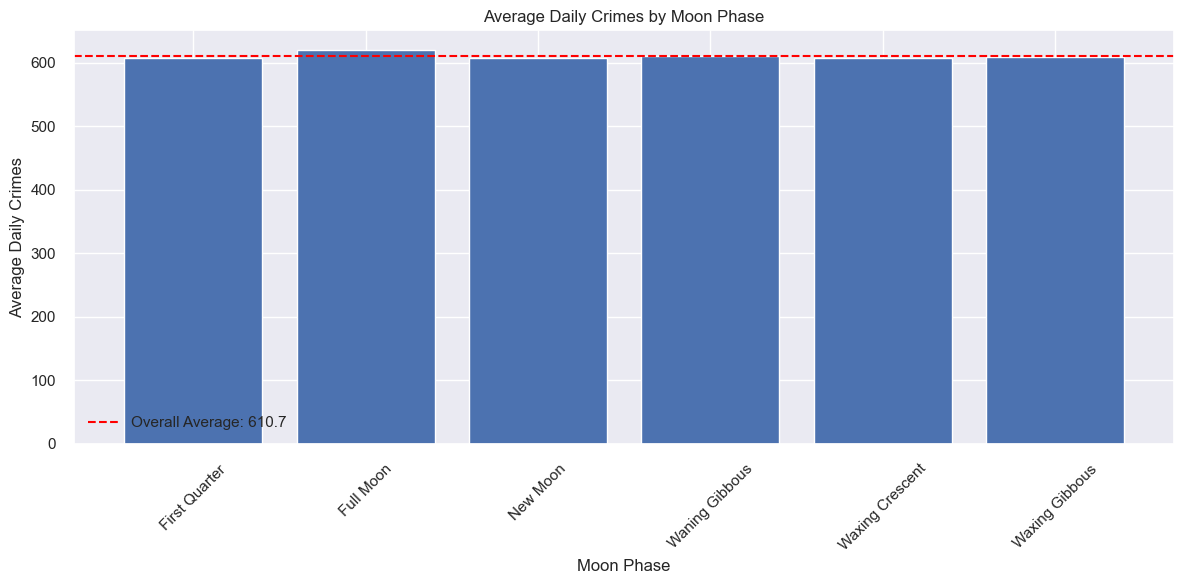


Average Daily Crimes by Moon Phase:
        Moon Phase  Avg Daily Crimes  Number of Days
0    First Quarter        607.901961             153
1        Full Moon        620.370968              62
2         New Moon        607.554422             294
3   Waning Gibbous        610.760000             225
4  Waxing Crescent        607.928571             560
5   Waxing Gibbous        609.959292             565


In [42]:
def categorize_moon_phase_detailed(phase):
    if 0 <= phase < 6.25:
        return 'New Moon'
    elif 6.25 <= phase < 43.75:
        return 'Waxing Crescent'
    elif 43.75 <= phase < 56.25:
        return 'First Quarter'
    elif 56.25 <= phase < 93.75:
        return 'Waxing Gibbous'
    elif 93.75 <= phase < 96.25:
        return 'Full Moon'
    elif 96.25 <= phase < 133.75:
        return 'Waning Gibbous'
    elif 133.75 <= phase < 146.25:
        return 'Last Quarter'
    elif 146.25 <= phase < 183.75:
        return 'Waning Crescent'
    else:
        return 'Unknown'

# Add detailed moon phase names to the dataframe
df['Moon Phase Name'] = df['Moon Phase'].apply(categorize_moon_phase_detailed)

# Calculate average daily crimes by moon phase
avg_crimes_by_phase = df.groupby(['DATE OCC', 'Moon Phase Name']).size().reset_index(name='crimes')
avg_crimes_by_phase = avg_crimes_by_phase.groupby('Moon Phase Name')['crimes'].agg(['mean', 'count']).reset_index()
avg_crimes_by_phase.columns = ['Moon Phase', 'Avg Daily Crimes', 'Number of Days']

# Calculate overall average
overall_average = avg_crimes_by_phase['Avg Daily Crimes'].mean()


# Create bar plot
plt.figure(figsize=(12, 6))
plt.bar(avg_crimes_by_phase['Moon Phase'], avg_crimes_by_phase['Avg Daily Crimes'])
plt.title('Average Daily Crimes by Moon Phase')
plt.xlabel('Moon Phase')
plt.ylabel('Average Daily Crimes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.axhline(y=overall_average, color='red', linestyle='--', label=f'Overall Average: {overall_average:.1f}')
plt.legend()
plt.show()


# Print the numerical results
print("\nAverage Daily Crimes by Moon Phase:")
print(avg_crimes_by_phase)